In [83]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg

warnings.filterwarnings("ignore")

# Вектора

*Вектора*. Загрузим датасет "Hessen House Prices Dataset" из kaggle (https://www.kaggle.com/orgesleka/hessen-house-prices-dataset). 1 вектор в данной таблице - это один дом с различными показателями.

In [2]:
url="http://yustiks.ru/dataset/houses.json"
df=pd.read_json(url)
df.head()

,posterid,Haustyp,Angebotstyp,Wohnflaeche__m²_,Zimmer,abtest,plz,Verkaeufer,yo_m,Baujahr,...,Verfuegbar_ab_Jahr,Dachboden,Verfuegbar_ab_Monat,Nebenkosten__in_€_,Kaution__in_€_,Haustiere_erlaubt,Warmmiete__in_€_,Heizkosten__in_€_,WG_geeignet,Denkmalobjekt
0,50316225,einfamilienhaus,Angebot,160,6,control,33378,gewerblich,A,1928.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50379245,mehrfamilienhaus,Angebot,160,8.0,control,65207,gewerblich,A,1968.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40815451,einfamilienhaus,Angebot,120,4,control,54647,gewerblich,A,1750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49513983,einfamilienhaus,Angebot,140,5,control,7646,gewerblich,A,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49797192,einfamilienhaus,Angebot,80,4,control,54597,gewerblich,A,1900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Названия параметров здесь даны на немецком языке. 
В целом, каждая колонка несет информацию о доме.
*  Aktuell_vermietet	- текущий съем
*  Angebotstyp	- тип предложения
*  Badewanne	- ванна
*  Balkon	- балкон
*  Barrierefrei	- доступность
*  Baujahr	- в каком году был куплен
*  Dachboden	- чердак
*  Denkmalobjekt	- тип фундамента
*  Dusche - душ
*  Einbaukueche	 - кухня
*  Einliegerwohnung - апартаменты
*  ExactPreis	- стоимость дома (квартиры)
*  Gaeste_WC	- гостевой туалет
*  Garage/Stellplatz	- гараж
*  Garten/_mitnutzung	- сад
*  Grundstuecksflaeche__m²_	- площадь
*  Haustiere_erlaubt	- наличие домашних животных
*  Haustyp	- тип дома
*  Heizkosten__in_€_	- самая высокая цена
*  Heizungsart	- отопление
*  Kaution__in_€_	- депозит
*  Keller	- чердак
*  Moebliert/Teilmoebliert	
*  Nebenkosten__in_€_	- цена на соседние дома
*  Preis	- стоимость
*  Provision	- комиссия
*  Terrasse	- терраса
*  Verfuegbar_ab_Jahr	
*  Verfuegbar_ab_Monat	
*  Verkaeufer	- продавец
*  WG_geeignet	- туалет
*  Warmmiete__in_€_	- стоимость аренды включая отопление
*  Wohnflaeche__m²_	- площадь жилого помещения
*  Zimmer	- комната
*  abtest	
*  adid
*  elasticSearch	
*  kw	- пояснения о доме
*  plz	
*  posterid	- id объявления
*  yo_m	
*  yo_s

Каждый вектор имеет размер 42. Те вектора, в которых отсутстсвуют параметры (есть значения Nan), должны быть предобработаны, чтобы размерность векторов стала одинаковой. Для наглядности, создадим новую таблицу, куда включим только несколько столбцов: это когда был куплен дом, количество комнат, площадь дома и стоимость дома.

In [3]:
df_1 = df[['Baujahr','Zimmer','Wohnflaeche__m²_','Preis']]
df_1.head()

,Baujahr,Zimmer,Wohnflaeche__m²_,Preis
0,1928.0,6,160,90000.0
1,1968.0,8.0,160,90000.0
2,1750.0,4,120,70000.0
3,2017.0,5,140,90000.0
4,1900.0,4,80,90000.0


Почистим данные от Nan:

In [4]:
df_1 = df_1.dropna()

Колонка Zimmer представлена ввиде строк, ее приведем к типу float:

In [5]:
df_1['Zimmer'] = (df_1['Zimmer']).astype(float).astype(int)

Нарисуем несколько векторов в 3D пространстве: возьмем первые 3 дома из таблицы.

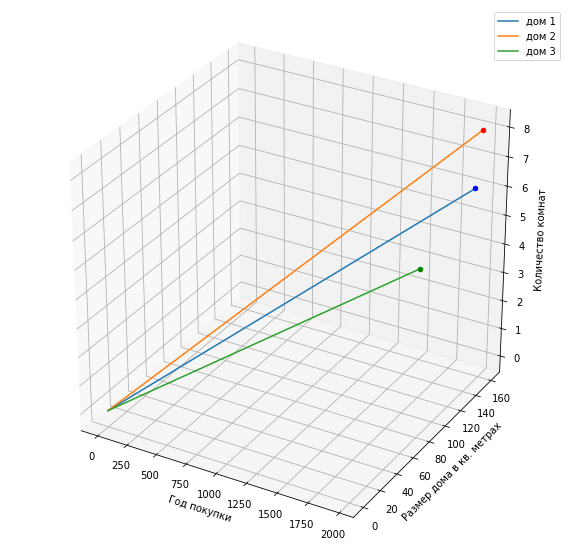

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['Zimmer'])

ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])
ax.plot([0,x[2]], [0,y[2]], [0,z[2]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')
ax.scatter(x[2], y[2], z[2], c='g', marker='o')

ax.set_xlabel('Год покупки')
ax.set_ylabel('Размер дома в кв. метрах')
ax.set_zlabel('Количество комнат')
ax.legend(['дом 1', 'дом 2', 'дом 3'])

plt.show()

Каждый дом представляет собой вектор в неком пространстве. Это пространстве может быть многомерным.В данном случае возьмем 3D пространство

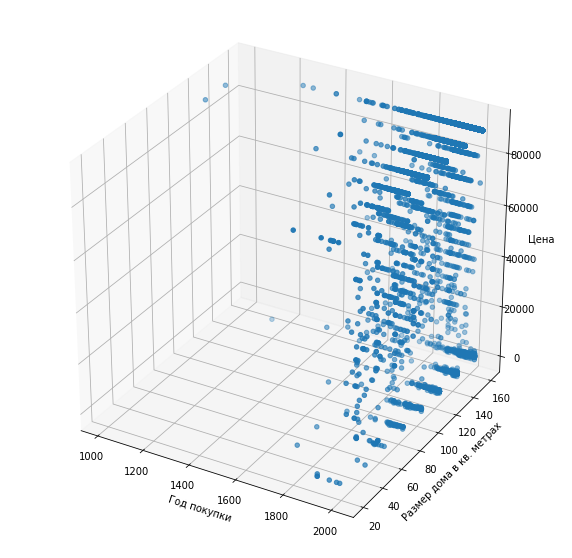

In [90]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['Preis'])

ax.scatter(x, y, z)
ax.set_xlabel('Год покупки')
ax.set_ylabel('Размер дома в кв. метрах')
ax.set_zlabel('Цена')
plt.show()

# Проекция одного вектора на другой

Дана **фигура человека** в пространстве 3D. Даны параметрические точки (локоть, кисти, коленки, таз..). Всего таких точек в данном случае 25.

In [59]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('data/joints.txt', sep=' ', names = ns)
print(dfJointsVertexes.head())
print(len(dfJointsVertexes))

  type         x         y         z
0    v  0.000889  0.119490  0.010071
1    v  0.098418 -0.053715 -0.021635
2    v  0.098418 -0.053715 -0.021635
3    v  0.093672 -0.398935 -0.008132
4    v  0.094885 -0.758728 -0.036067
25


Точки в 3D пространстве

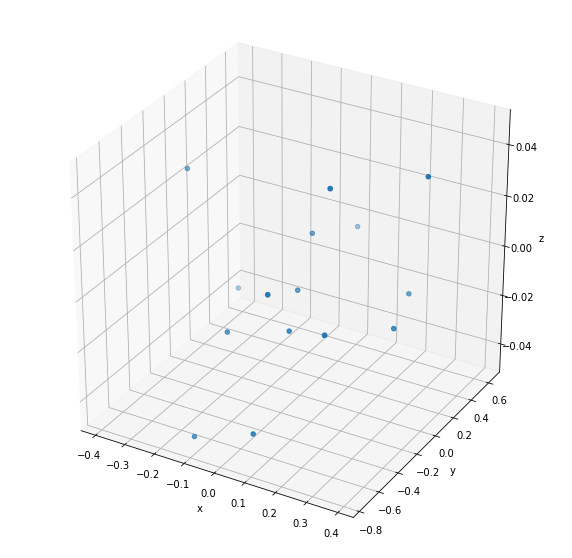

In [60]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(dfJointsVertexes.x)
y = np.array(dfJointsVertexes.y)
z = np.array(dfJointsVertexes.z)

ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Отсортируем точки по x значениям

In [70]:
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

Точки в 2D пространстве

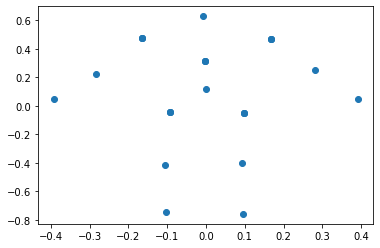

In [71]:
plt.scatter(df.x, df.y)

Как посчитать расстояние от правого локтя до точки живота?

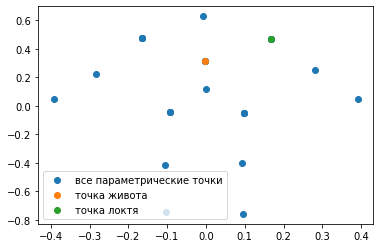

In [94]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[13], df.y[13])
plt.legend(['все параметрические точки', 'точка живота', 'точка локтя'])

Найдем расстояние от точки локтя до позвоночника:

In [108]:
dist = math.sqrt(math.pow((df.x[9]-df.x[13]), 2) + math.pow((df.y[9]-df.y[13]), 2) + math.pow((df.z[9]-df.z[13]), 2))

In [109]:
print('Расстояние от точки локтя до точки живота: ', dist)

Расстояние от точки локтя до точки живота:  0.23641655587331445


Второй метод

In [110]:
vect = [df.x[9]-df.x[13], df.y[9]-df.y[13], df.z[9]-df.z[13]]
np.linalg.norm(vect)

0.23641655587331445

**Посчитать расстояние от точки локтя до позвоночника**

Известны номера точек локтя и точек позвоночника:

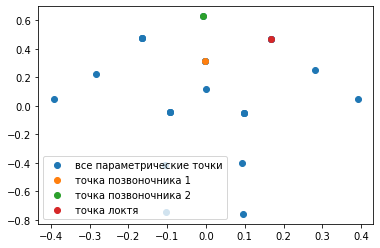

In [103]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[13], df.y[13])
plt.legend(['все параметрические точки', 'точка позвоночника 1','точка позвоночника 2', 'точка локтя'])

Спроецируем точку локтя на вектор позвоночника

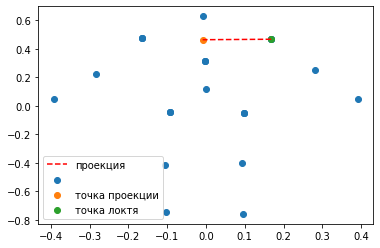

In [114]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
# вектор w - вектор локтя
w = np.array([df.x[13],df.y[13]])

# строим проекцию данной точки w на вектор v: cv
cv = 0 + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', '', 'точка проекции', 'точка локтя'])

Расстояние от точки локтя до позвоночника - модуль вектора, образованного разностью двух точек: cv и w. 

In [106]:
linalg.norm(cv - w)

0.17650784419550491

## Типы матриц

Вспомним про типы матриц из лекции:

1) m = n => **квадратная**, иначе **прямоугольная**

2) m = 1 => матрица-строка

3) n = 1 => матрица-столбец

4) **нулевая матрица**, если все элементы = 0

5) **диагональная (единичная)**

6) **треугольная(нижнетреугольная, верхнетреугольная)**

7) **ортогональная**

Посмотрим на встроенные функции <b>numpy</b> для создания матриц с вышеперечисленными свойствами

### Создаём матрицу нужной размерности

In [7]:
m0 = np.round(np.random.rand(3,2), 2)
print(m0)

[[0.06 0.62]
 [0.43 0.3 ]
 [0.77 0.84]]


### Создаём строку

In [8]:
m = np.random.rand(3)
print(m)

[0.4214401  0.61395387 0.19418635]


### Создаём столбец

In [9]:
m = np.random.rand(1,3)
print(m)

[[0.9648713  0.22099979 0.97657788]]


### Создаём нулевую матрицу

In [10]:
m1 = np.zeros((3,4))
print(m1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Можно создать нулевую матрицу размера уже существующей

In [11]:
m1 = np.zeros_like(m0)
print('было:')
print(m0)
print('')
print('стало:')
print(m1)

было:
[[0.06 0.62]
 [0.43 0.3 ]
 [0.77 0.84]]

стало:
[[0. 0.]
 [0. 0.]
 [0. 0.]]


### Создаём диагональную матрицу

In [12]:
m = np.diag([1,2,3])
print(m)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


### Создаём единичную матрицу

In [13]:
m = np.ones((3,4))
print(m)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Можно создать единичную матрицу размера уже существующей

In [14]:
m1 = np.ones_like(m0)
print('было:')
print(m0)
print('')
print('стало:')
print(m1)

было:
[[0.06 0.62]
 [0.43 0.3 ]
 [0.77 0.84]]

стало:
[[1. 1.]
 [1. 1.]
 [1. 1.]]


### Также можно создать квадратную единичную матрицу следующей командой:

In [15]:
m = np.eye(3)
print(m)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Можно создавать **нижнетреугольные** матрицы (tril = triangle + lower)

In [16]:
array_matrix = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print('было:')
print(array_matrix)
print('')
print('стало:')
m = np.tril(array_matrix, -1)
print(m)

было:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

стало:
[[ 0  0  0]
 [ 4  0  0]
 [ 7  8  0]
 [10 11 12]]


In [17]:
m = np.tril(array_matrix, 0)
print(m)

[[ 1  0  0]
 [ 4  5  0]
 [ 7  8  9]
 [10 11 12]]


### А также верхнетреугольные (triu = triangle + upper)

In [18]:
m = np.triu(array_matrix, -1)
print(m)

[[ 1  2  3]
 [ 4  5  6]
 [ 0  8  9]
 [ 0  0 12]]


In [19]:
m = np.triu(array_matrix, 0)
print(m)

[[1 2 3]
 [0 5 6]
 [0 0 9]
 [0 0 0]]


### Определитель матрицы

In [20]:
m = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 6]], dtype=np.float32)
det = np.linalg.det(m)
print('исходная матрица:')
print(m)
print('определитель матрицы:')
print(det)

исходная матрица:
[[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 6.]]
определитель матрицы:
-1.0


### Транспонирование матрицы

In [21]:
x = np.arange(15).reshape((5,3))
print('Исходная матрица:')
print(x)

Исходная матрица:
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [22]:
print('Транспонированная матрица:')
np.transpose(x)

Транспонированная матрица:


array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

### Сложение и умножение матрицы на скаляр

In [23]:
A = np.array(([1,3,3],[1,4,3],[1,3,4]))
print('Исходная матрица:')
print(A)

Исходная матрица:
[[1 3 3]
 [1 4 3]
 [1 3 4]]


In [24]:
C = A + 100
print('Сложение матрицы со скаляром (100):')
print(C)

Сложение матрицы со скаляром (100):
[[101 103 103]
 [101 104 103]
 [101 103 104]]


In [25]:
C = A * 100
print('Умножение матрицы на число (100):')
print(C)

Умножение матрицы на число (100):
[[100 300 300]
 [100 400 300]
 [100 300 400]]


### Обратная матрица

In [26]:
A = np.array(([1,3,3],[1,4,3],[1,3,4]))
print('Исходная матрица:')
print(A)

Исходная матрица:
[[1 3 3]
 [1 4 3]
 [1 3 4]]


In [27]:
A_inv = np.linalg.inv(A)
print('Обратная матрица:')
print(A_inv)

Обратная матрица:
[[ 7. -3. -3.]
 [-1.  1.  0.]
 [-1.  0.  1.]]


In [28]:
I = A_inv.dot(A)
print('Умножение исходной матрицы на обратную:')
print(I)

Умножение исходной матрицы на обратную:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Преобразование с помощью матрицы преобразований

In [29]:
A = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 1]
    ])

Исходный прямоугольник:

(-2.0, 2.0)

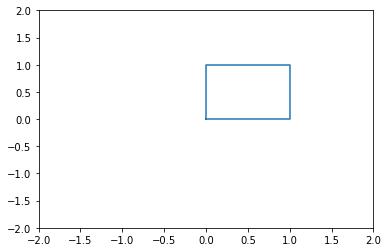

In [30]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-2, 2])
plt.xlim([-2, 2])

Матрица преобразования:

In [31]:
TransformArray = np.array([
    [-1, -1, 0],
    [1, 3, 0],
    [0, 0, 1]
])

In [32]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)

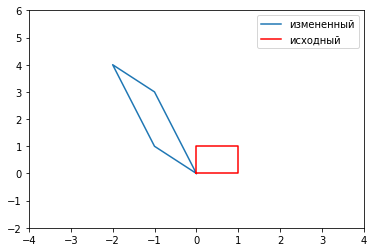

In [33]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-2, 6])
plt.xlim([-4, 4])
plt.legend(['измененный', 'исходный'])

Допустим, матрица трансформаций выглядит следующим образом:

In [34]:
A = np.array([[-1, 3], [2, -2]])
A

array([[-1,  3],
       [ 2, -2]])

Применим её к следующему вектору:

In [35]:
v = np.array([[2], [1]])
v

array([[2],
       [1]])

Построим вектор **v** в пространстве:

(-1.0, 4.0)

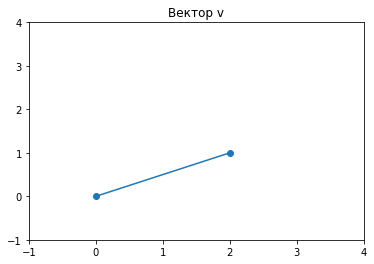

In [36]:
plt.plot([0,v[0]],[0,v[1]],'-o')
plt.title('Вектор v')
plt.ylim(-1, 4)
plt.xlim(-1, 4)

Умножим на матрицу преобразований:

[[1]
 [2]]


(-1.0, 4.0)

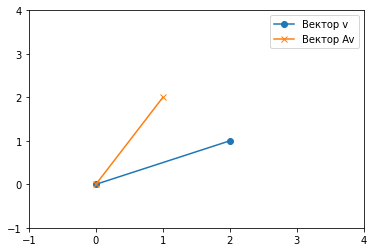

In [37]:
Av = A.dot(v)
print(Av)
plt.plot([0,v[0]],[0,v[1]],'-o')
plt.plot([0,Av[0]],[0,Av[1]],'-x')
plt.legend(['Вектор v','Вектор Av'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

Применив матрицу трансформаций A, мы изменили положение вектора в пространстве.

Представьте, что трансформация вектора **v** с помощью матрицы **A** даёт новый вектор, который направлен в том же направлении, что и исходный. Такой вектор называется **собственный**.

Запишем формулу для собственного вектора:
$$\boldsymbol{A\upsilon }=\lambda \boldsymbol{\upsilon }$$

Допустим, матрица A имеет вид:
$$\boldsymbol{A}=\begin{bmatrix}
5 & 1\\ 
3 & 3
\end{bmatrix}$$

Один из собственных векторов имеет вид:
$$\boldsymbol{v}=\begin{bmatrix}
1\\
1
\end{bmatrix}$$

Проверим это:
$$\begin{bmatrix}
5 & 1\\ 
3 & 3
\end{bmatrix}\cdot \begin{bmatrix}
1\\ 
1
\end{bmatrix}=\begin{bmatrix}
6\\ 
6
\end{bmatrix}=6\cdot \begin{bmatrix}
1\\ 
1
\end{bmatrix}=\lambda \cdot \begin{bmatrix}
1\\ 
1
\end{bmatrix}$$

Посмотрим направление собственного вектора:

In [38]:
A = np.array([[5, 1], [3, 3]])
A

array([[5, 1],
       [3, 3]])

In [39]:
v = np.array([[1], [1]])
v

array([[1],
       [1]])

(-1.0, 7.0)

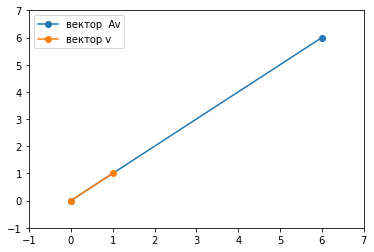

In [40]:
Av = A.dot(v)

plt.plot([0,Av[0]],[0,Av[1]], '-o')
plt.plot([0,v[0]], [0,v[1]], '-o')
plt.legend(['вектор  Av', 'вектор v'])
plt.ylim(-1, 7)
plt.xlim(-1, 7)

Можно заметить, что при трансформации направление вектора не поменялось. 

Второй собственный вектор данной матрицы:
$$\boldsymbol{v}=\begin{bmatrix}
1\\ 
-3
\end{bmatrix}$$

Проверим направление векторов:

In [41]:
v = np.array([[1], [-3]])
v

array([[ 1],
       [-3]])

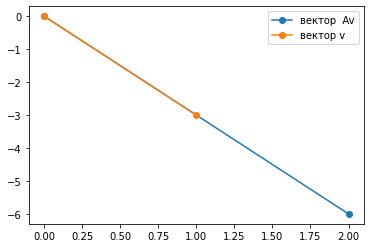

In [42]:
Av = A.dot(v)

plt.plot([0,Av[0]],[0,Av[1]], '-o')
plt.plot([0,v[0]], [0,v[1]], '-o')
plt.legend(['вектор  Av', 'вектор v'])


Собственные вектора при умножении на матрицу трансформаций не меняют направление, изменяется только длина вектора.

Пример подсчета собственного вектора и собственных чисел программно

In [43]:
from numpy import linalg as LA

A = np.array([[5, 1], [3, 3]])

e_vals, e_vecs = LA.eig(A)
print('Исходная матрица: \n', A)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[5 1]
 [3 3]]
Собственные вектора: 
 [[ 0.70710678 -0.31622777]
 [ 0.70710678  0.9486833 ]]
Собственные значения:  [6. 2.]


Найденные векторы отличаются по размеру от вышеприведенных векторов, но направлены они одинаково. Для обоих векторов выполняется следующая формула:
$$\boldsymbol{A\upsilon }=\lambda \boldsymbol{\upsilon }$$